In [109]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as PLT
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.preprocessing import LabelBinarizer
from nltk.tokenize.toktok import ToktokTokenizer
from nltk import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.layers import Input,Dense,Flatten,Embedding,Conv1D,MaxPool1D,concatenate,Dropout,Conv2D,MaxPool2D,Activation,BatchNormalization

In [2]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [33]:
#importing the training data
imdb_data=pd.read_csv('Datasets/Sentiment Analysis/IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [35]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

from string import punctuation
def punctuation_cleaner(string):
    global punctuation
    punctuation = punctuation+'\n\\//'
    s = str.maketrans('','',punctuation)
    return string.translate(s)

from bs4 import BeautifulSoup
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = punctuation_cleaner(text)
    return text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)

C:\Users\allam\Anaconda3\lib\site-packages\bs4\__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


In [36]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

In [37]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

In [39]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

{'any', 'there', 'hers', 'couldn', "weren't", 'them', 'then', 'where', 'same', 'y', 'ain', 't', 'they', 'some', "needn't", 'this', "aren't", 'she', 'once', "that'll", 'as', 'through', 'how', 'him', 'mightn', "shan't", 'or', "it's", 'theirs', "she's", 'we', 'to', 'at', 'out', 'can', 'in', 'up', "haven't", 'aren', 'again', 'now', 'further', 'most', 'too', 'a', 'itself', 'so', 'needn', 'is', 'he', 'their', 'my', 'both', "hadn't", 'ma', 'which', 'all', 'yours', 'haven', 'into', 'm', 'won', 'down', "wasn't", 'other', 'were', 'about', 'yourself', 'am', 'wasn', 'not', 'why', 's', 'what', 'are', 'under', "shouldn't", "should've", 'our', "isn't", 'no', 'hadn', 'do', 'did', 'until', 'it', "couldn't", "hasn't", 'between', 'an', 'over', 'was', 'against', "wouldn't", 'who', 'o', 'yourselves', 'such', 'herself', 'only', 'of', 'i', 'shouldn', 'that', 'if', 'ours', "you've", 'because', 'on', 'below', 'off', 'you', 'few', 'while', 're', 'her', 'd', 'the', "you'd", 'hasn', 'during', 'doesn', "mightn't",

In [50]:
# Export the preprocessed dataframe into a CSV file
review = imdb_data['review']
sentiment = imdb_data['sentiment']
data = pd.concat((review, sentiment), axis=1)
data.to_csv("Datasets/Sentiment Analysis/preprocessed_imdb.csv", index=False)

In [92]:
#labeling the sentiment data
lb=LabelBinarizer()
#Transformed sentiment data
target=lb.fit_transform(data['sentiment'])
print(target.shape)

X_train,X_test,Y_train,Y_test = train_test_split(data.iloc[:,:-1],target,test_size=.2)
print('Shape of X_Train : ', X_train.shape)
print('Shape of Y_Train : ', Y_train.shape)
print('Shape of X_Test : ', X_test.shape)
print('Shape of Y_Test : ', Y_test.shape)

(50000, 1)
Shape of X_Train :  (40000, 1)
Shape of Y_Train :  (40000, 1)
Shape of X_Test :  (10000, 1)
Shape of Y_Test :  (10000, 1)


In [52]:
#normalized train reviews
norm_train_reviews = data.review[:40000]
norm_train_reviews[0]

'one review ha mention watch 1 oz episod youll hook right thi exactli happen meth first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

In [53]:
#Normalized test reviews
norm_test_reviews= data.review[40000:]
norm_test_reviews[45005]

'read review watch thi piec cinemat garbag took least 2 page find somebodi els didnt think thi appallingli unfunni montag wasnt acm humour 70 inde ani era thi isnt least funni set sketch comedi ive ever seen itll till come along half skit alreadi done infinit better act monti python woodi allen wa say nice piec anim last 90 second highlight thi film would still get close sum mindless drivelridden thi wast 75 minut semin comedi onli world semin realli doe mean semen scatolog humour onli world scat actual fece precursor joke onli mean thi handbook comedi tit bum odd beaver niceif pubesc boy least one hand free havent found playboy exist give break becaus wa earli 70 way sketch comedi go back least ten year prior onli way could even forgiv thi film even made wa gunpoint retro hardli sketch clown subtli pervert children may cut edg circl could actual funni come realli quit sad kept go throughout entir 75 minut sheer belief may save genuin funni skit end gave film 1 becaus wa lower scoreand

In [99]:
max_len = data['review'].str.split(' ').str.len().max() 
max_len

1483

In [100]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['review'])

In [101]:
vocab_len = len(tokenizer.word_index) + 1 
vocab_len

155340

In [102]:
X_train = tokenizer.texts_to_sequences(X_train['review'])
X_train = pad_sequences(X_train,maxlen=max_len,padding='post')

In [103]:
X_test = tokenizer.texts_to_sequences(X_test['review'])
X_test = pad_sequences(X_test,maxlen=max_len,padding='post')

In [104]:
model = Sequential([
    Embedding(input_dim=vocab_len,output_dim=200,input_shape=(max_len,)),
    Conv1D(filters=32, kernel_size=4, activation='relu'),
    Dropout(.2),
    MaxPool1D(pool_size=2),
    Flatten(),
    Dense(10,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(
    loss='binary_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
)

In [105]:
history = model.fit(X_train,Y_train,epochs=5,batch_size=20,validation_data=(X_test,Y_test))

Epoch 1/5
2000/2000 [==============================] - 2198s 1s/step - loss: 0.3138 - accuracy: 0.8616 - val_loss: 0.2594 - val_accuracy: 0.8937
Epoch 2/5
2000/2000 [==============================] - 1006s 503ms/step - loss: 0.1235 - accuracy: 0.9545 - val_loss: 0.3074 - val_accuracy: 0.8851
Epoch 3/5
2000/2000 [==============================] - 775s 387ms/step - loss: 0.0362 - accuracy: 0.9880 - val_loss: 0.3994 - val_accuracy: 0.8801
Epoch 4/5
2000/2000 [==============================] - 762s 381ms/step - loss: 0.0121 - accuracy: 0.9961 - val_loss: 0.5624 - val_accuracy: 0.8830
Epoch 5/5
2000/2000 [==============================] - 742s 371ms/step - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.6042 - val_accuracy: 0.8636


In [106]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 1483, 200)         31068000  
                                                                 
 conv1d_10 (Conv1D)          (None, 1480, 32)          25632     
                                                                 
 dropout_9 (Dropout)         (None, 1480, 32)          0         
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 740, 32)          0         
 g1D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 23680)             0         
                                                                 
 dense_18 (Dense)            (None, 10)                236810    
                                                     

In [110]:
# Pickle the history object
with open('history.pickle', 'wb') as f:
    pickle.dump(history.history, f)
    
# Save the model1    
model.save('datasets/models/imdb_1.h5')

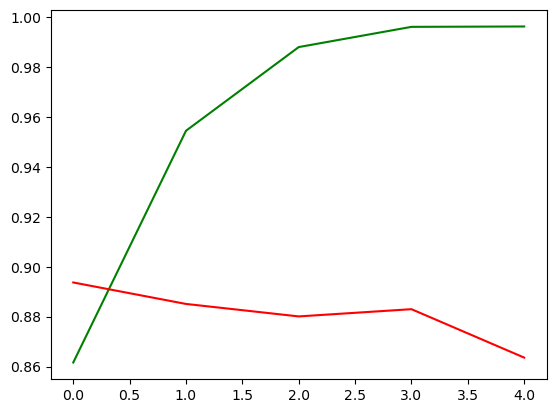

In [111]:
PLT.plot(history.history['accuracy'], color='green', label='train data')
PLT.plot(history.history['val_accuracy'], color='red', label='test data')

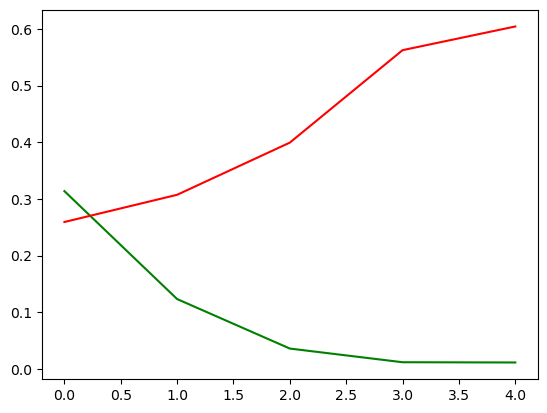

In [112]:
PLT.plot(history.history['loss'], color='green', label='train data')
PLT.plot(history.history['val_loss'], color='red', label='test data')